In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Loading the preprocessed data

In [2]:
df_data = pd.read_csv('raw_data/df_electricity_merged.csv')

In [3]:
df_data

,datetime,datetime_utc,date,day,month,year,hour_index,day_of_week,price_de,price_de_lag_24,...,gen_at,gen_at_lag_24,gen_fr,gen_fr_lag_24,windoff_de,windoff_de_lag_24,windon_de,windon_de_lag_24,solar_de,solar_de_lag_24
0,2022-11-01 00:00:00+01,2022-10-31 23:00:00+00:00,2022-11-01,1,11,2022,0,1,80.65,129.38,...,4079.2,2991.0,40284.0,36238.0,5331.8525,2384.8325,16063.7425,6744.5025,0.0,0.0
1,2022-11-01 01:00:00+01,2022-11-01 00:00:00+00:00,2022-11-01,1,11,2022,1,1,76.68,119.09,...,4027.1,2942.3,39246.0,36353.5,5206.9600,2536.8800,16839.0400,6414.3500,0.0,0.0
2,2022-11-01 02:00:00+01,2022-11-01 01:00:00+00:00,2022-11-01,1,11,2022,2,1,55.26,116.32,...,3933.9,2940.3,39366.5,36030.0,5295.7975,2461.7675,17616.8775,5744.3775,0.0,0.0
3,2022-11-01 03:00:00+01,2022-11-01 02:00:00+00:00,2022-11-01,1,11,2022,3,1,37.00,114.60,...,3766.6,2869.9,37003.5,35798.5,5410.9475,2317.1050,17984.3850,5127.0875,0.0,0.0
4,2022-11-01 04:00:00+01,2022-11-01 03:00:00+00:00,2022-11-01,1,11,2022,4,1,38.76,115.07,...,3585.8,2988.1,34949.5,36479.0,5552.2900,2176.6850,18902.0375,4400.1125,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9401,2023-11-27 19:00:00+01,2023-11-27 18:00:00+00:00,2023-11-27,27,11,2023,19,0,117.12,143.78,...,8048.2,9631.7,67186.0,66263.0,5655.6600,912.4075,19610.9375,8586.9775,0.0,0.0
9402,2023-11-27 20:00:00+01,2023-11-27 19:00:00+00:00,2023-11-27,27,11,2023,20,0,100.61,135.91,...,7182.3,7971.9,65092.0,65548.5,5723.7850,769.3625,19850.2150,8735.0100,0.0,0.0
9403,2023-11-27 21:00:00+01,2023-11-27 20:00:00+00:00,2023-11-27,27,11,2023,21,0,94.46,122.41,...,6889.9,6812.3,61485.0,63025.0,5770.7025,654.9925,19866.5850,8688.0825,0.0,0.0
9404,2023-11-27 22:00:00+01,2023-11-27 21:00:00+00:00,2023-11-27,27,11,2023,22,0,95.20,118.99,...,6623.8,6340.0,59942.5,61792.5,5851.5325,575.8400,19787.7525,8613.6325,0.0,0.0


#### Choosing a cutoff date arbitrarily (2023-11-11)

<Axes: xlabel='date'>

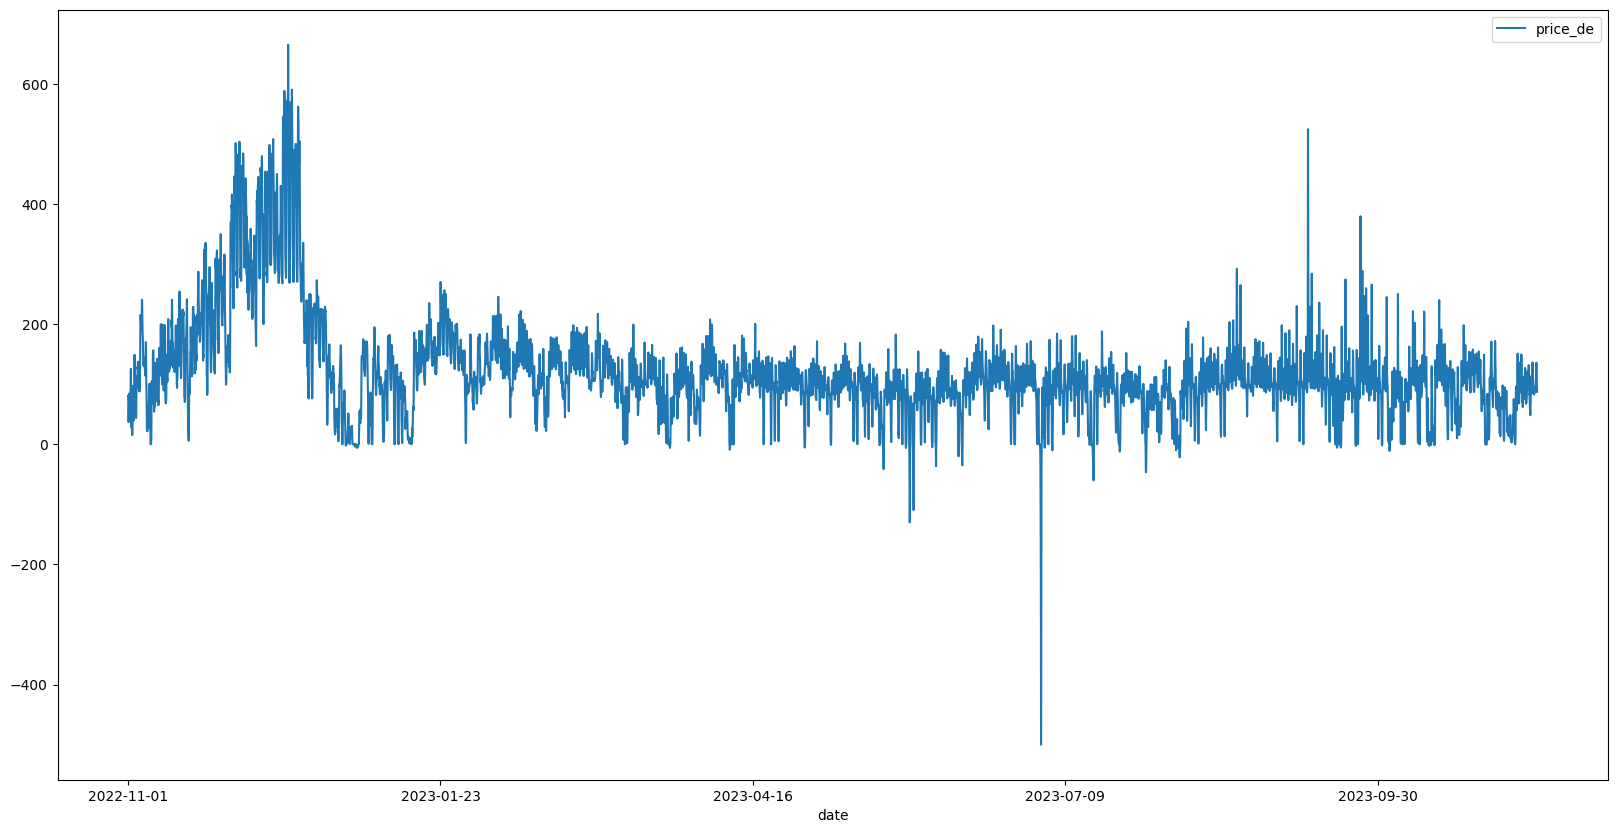

In [5]:
df_data[df_data['date'] <= '2023-11-11'].plot(x='date', y='price_de', figsize=(20,10))

In [4]:
df_data.iloc[:, 3:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                9406 non-null   int64  
 1   month              9406 non-null   int64  
 2   year               9406 non-null   int64  
 3   hour_index         9406 non-null   int64  
 4   day_of_week        9406 non-null   int64  
 5   price_de           9406 non-null   float64
 6   price_de_lag_24    9406 non-null   float64
 7   price_de_lag_48    9406 non-null   float64
 8   price_de_lag_168   9406 non-null   float64
 9   price_de_lag_336   9406 non-null   float64
 10  price_de_avg_24    9406 non-null   float64
 11  price_de_avg_168   9406 non-null   float64
 12  price_at           9406 non-null   float64
 13  price_at_lag_24    9406 non-null   float64
 14  price_at_avg_24    9406 non-null   float64
 15  price_at_avg_168   9406 non-null   float64
 16  price_fr           9406 

#### Date to forecast: 2023-11-11

<Axes: xlabel='date'>

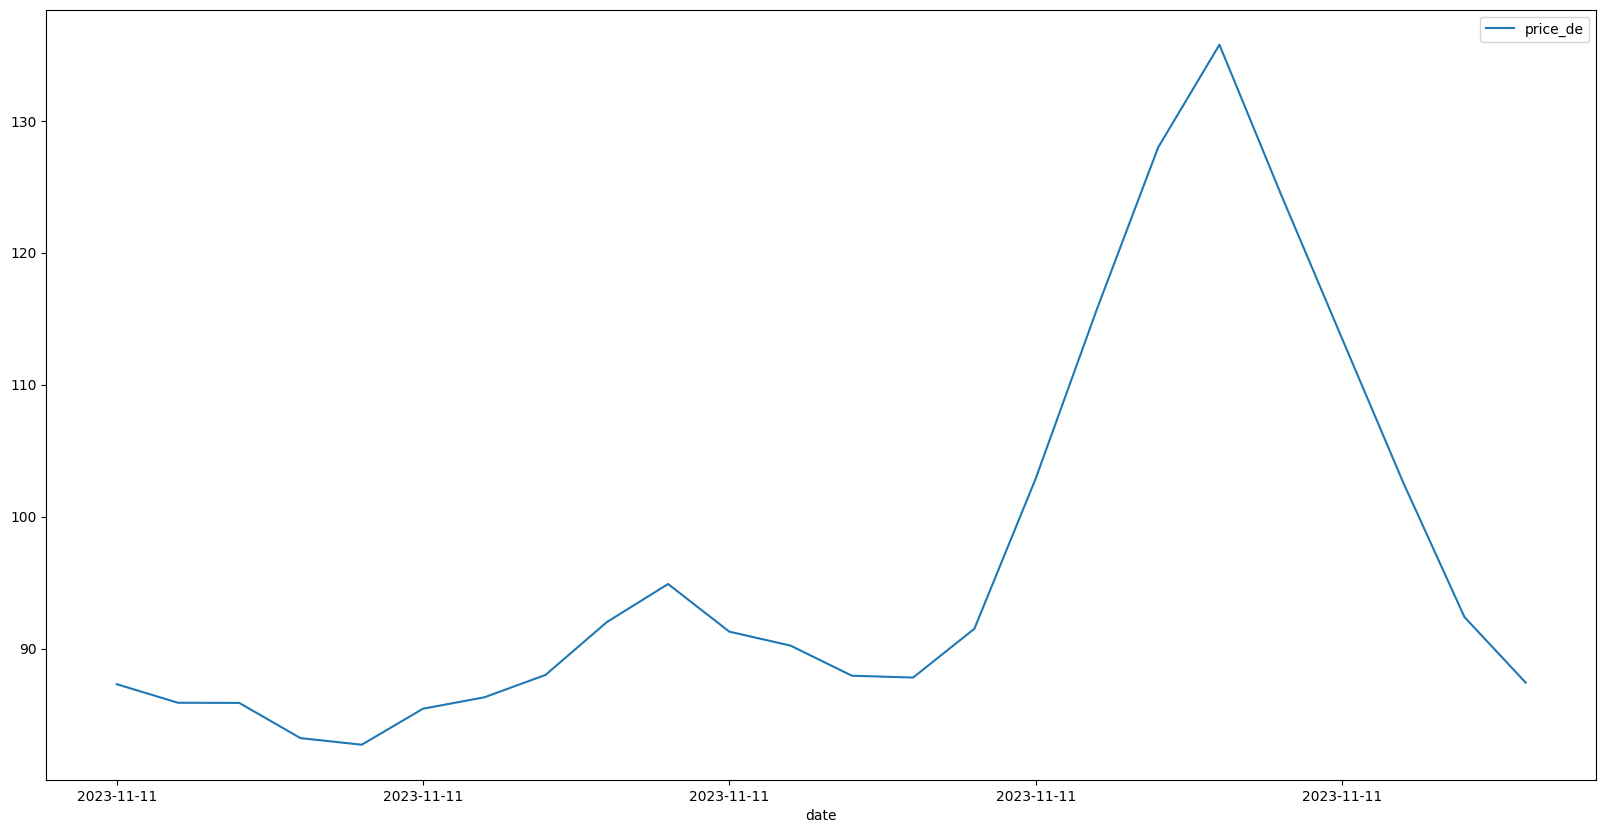

In [6]:
df_data[df_data['date'] == '2023-11-11'].plot(x='date', y='price_de', figsize=(20,10))

In [8]:
df_data[['date', 'datetime', 'price_de', 'hour_index']].query('date == "2023-11-11"')

,date,datetime,price_de,hour_index
8998,2023-11-11,2023-11-11 00:00:00+01,87.30,0
8999,2023-11-11,2023-11-11 01:00:00+01,85.89,1
9000,2023-11-11,2023-11-11 02:00:00+01,85.88,2
9001,2023-11-11,2023-11-11 03:00:00+01,83.21,3
9002,2023-11-11,2023-11-11 04:00:00+01,82.71,4
9003,2023-11-11,2023-11-11 05:00:00+01,85.44,5
9004,2023-11-11,2023-11-11 06:00:00+01,86.30,6
9005,2023-11-11,2023-11-11 07:00:00+01,88.00,7
9006,2023-11-11,2023-11-11 08:00:00+01,92.00,8
9007,2023-11-11,2023-11-11 09:00:00+01,94.89,9


#### Performing feature selection with RFE

In [9]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
df_scaled_X = scaler.fit_transform(df_data.iloc[:, 3:].drop(['price_de','price_at','price_fr'], axis=1))
df_scaled_y = scaler.fit_transform(df_data[['price_de']])

In [11]:
df_scaled_X

array([[-1.67030303,  1.18525946, -2.32913361, ..., -0.63254486,
        -0.63495143, -0.63562757],
       [-1.67030303,  1.18525946, -2.32913361, ..., -0.66630266,
        -0.63495143, -0.63562757],
       [-1.67030303,  1.18525946, -2.32913361, ..., -0.73480676,
        -0.63495143, -0.63562757],
       ...,
       [ 1.30430885,  1.18525946,  0.4293442 , ..., -0.4338155 ,
        -0.63495143, -0.63562757],
       [ 1.30430885,  1.18525946,  0.4293442 , ..., -0.44142794,
        -0.63495143, -0.63562757],
       [ 1.30430885,  1.18525946,  0.4293442 , ..., -0.45183972,
        -0.63495143, -0.63562757]])

In [12]:
df_scaled_y.ravel()

array([-0.43075748, -0.48009385, -0.74628658, ..., -0.25913649,
       -0.24994029, -0.37595309])

In [137]:
model = RandomForestRegressor()

In [138]:
rfe = RFE(model, n_features_to_select=15, step=1, verbose=1)
rfe = rfe.fit(df_scaled_X, df_scaled_y.ravel())

Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


In [139]:
pd.DataFrame([df_data.iloc[:, 3:].drop(['price_de','price_at','price_fr'], axis=1).columns, rfe.support_, rfe.ranking_]).T

,0,1,2
0,day,False,19
1,month,False,26
2,year,False,27
3,hour_index,False,13
4,day_of_week,False,22
5,price_de_lag_24,False,7
6,price_de_lag_48,False,9
7,price_de_lag_168,False,4
8,price_de_lag_336,True,1
9,price_de_avg_24,True,1


In [140]:
selected_features = df_data.iloc[:, 3:].drop(['price_de','price_at','price_fr'], axis=1).columns[rfe.support_]
pd.DataFrame([selected_features, rfe.estimator_.feature_importances_]).T

,0,1
0,price_de_lag_336,0.014957
1,price_de_avg_24,0.18768
2,price_at_lag_24,0.021106
3,price_at_avg_24,0.010666
4,price_fr_lag_24,0.129853
5,price_fr_avg_24,0.399555
6,load_de_lag_24,0.008404
7,load_de_lag_168,0.016163
8,load_at,0.024638
9,gen_de,0.007834


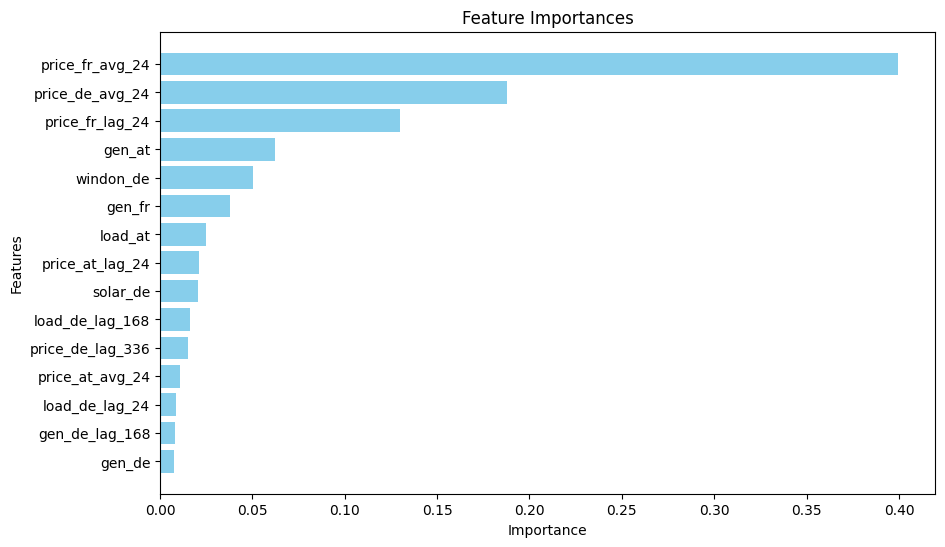

In [144]:
feature_importance_df = pd.DataFrame([selected_features, rfe.estimator_.feature_importances_]).T.sort_values(by=1, ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(feature_importance_df[0], feature_importance_df[1], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [141]:
filtered_df = df_data.iloc[:, 3:][selected_features]
filtered_df

,price_de_lag_336,price_de_avg_24,price_at_lag_24,price_at_avg_24,price_fr_lag_24,price_fr_avg_24,load_de_lag_24,load_de_lag_168,load_at,gen_de,gen_de_lag_168,gen_at,gen_fr,windon_de,solar_de
0,135.71,143.192083,130.59,145.302083,136.77,142.511250,48193.0200,49161.9775,4868.0,49417.49,50407.76,4079.2,40284.0,16063.7425,0.0
1,140.35,141.425000,119.09,144.504167,119.09,140.804167,44770.8675,48136.9350,4378.0,49446.61,49715.33,4027.1,39246.0,16839.0400,0.0
2,139.95,138.880833,116.32,143.657500,116.32,138.950417,43981.9450,47600.7900,4829.0,48568.35,49051.50,3933.9,39366.5,17616.8775,0.0
3,150.30,135.647500,114.60,142.480000,114.60,136.477083,43422.0775,47753.3075,4773.0,48487.32,49083.27,3766.6,37003.5,17984.3850,0.0
4,149.51,132.467917,115.07,141.435417,115.07,134.017500,43581.7450,49360.8175,4833.0,49072.56,50384.18,3585.8,34949.5,18902.0375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9401,81.27,118.861250,140.09,120.909583,146.10,119.420833,55247.1125,65854.6550,8430.0,67725.92,59469.49,8048.2,67186.0,19610.9375,0.0
9402,74.94,117.390417,135.91,120.153750,135.91,118.692917,53718.7450,63630.5750,7898.0,64837.21,56442.19,7182.3,65092.0,19850.2150,0.0
9403,61.36,116.225833,122.41,119.340833,122.41,117.875833,51508.2700,60142.8275,7338.0,61277.96,51158.61,6889.9,61485.0,19866.5850,0.0
9404,51.07,115.234583,118.99,118.428750,118.99,117.084583,50111.4500,56832.2650,7073.0,59481.88,47785.79,6623.8,59942.5,19787.7525,0.0


In [153]:
df_processsed = pd.concat([df_data.iloc[:, :3], df_data.iloc[:, 3:][selected_features], df_data[['price_de']]], axis=1)

In [154]:
df_processsed.to_csv('df_electricity_processed.csv', index=False)

#### Spliting the full dataset to train and test sets

In [6]:
df_full = pd.read_csv('df_electricity_processed.csv')

In [9]:
df_full[df_full['date'] == '2023-11-11'].drop(columns=['date', 'datetime'])

,datetime_utc,price_de_lag_336,price_de_avg_24,price_at_lag_24,price_at_avg_24,price_fr_lag_24,price_fr_avg_24,load_de_lag_24,load_de_lag_168,load_at,gen_de,gen_de_lag_168,gen_at,gen_fr,windon_de,solar_de,price_de
8998,2023-11-10 23:00:00+00:00,68.61,95.015417,65.62,99.890833,64.32,94.422917,48429.1425,45942.1875,5786.0,38133.71,47680.27,5311.9,54197.0,12174.5025,0.0000,87.30
8999,2023-11-11 00:00:00+00:00,64.59,96.105417,59.75,100.980000,59.73,95.512917,45261.6750,43090.5175,5565.0,36733.03,47320.98,4997.7,51700.5,11698.9300,0.0000,85.89
9000,2023-11-11 01:00:00+00:00,55.00,97.444583,53.74,102.319167,53.74,96.852083,43757.1975,41652.6000,5559.0,34924.21,47398.47,4781.9,50579.0,11689.8875,0.0000,85.88
9001,2023-11-11 02:00:00+00:00,60.51,98.896667,48.36,103.771250,48.36,98.304167,43413.8800,40960.8775,5415.0,34693.03,47341.06,4532.1,49535.0,11895.2550,0.0000,83.21
9002,2023-11-11 03:00:00+00:00,69.01,100.259583,50.00,105.134167,50.00,99.667083,44354.7750,40866.8275,5445.0,35366.32,48148.71,4500.3,48776.0,12127.9725,0.0000,82.71
9003,2023-11-11 04:00:00+00:00,66.47,101.037083,70.19,105.769583,67.76,100.403750,46561.7825,41433.6925,5737.0,36797.09,48837.77,4561.7,48745.0,12433.2300,0.0000,85.44
9004,2023-11-11 05:00:00+00:00,79.90,101.125417,99.36,105.225417,85.22,100.448750,50435.6075,42576.4925,6045.0,40130.24,49658.26,4711.0,48975.5,13073.1625,0.0000,86.30
9005,2023-11-11 06:00:00+00:00,90.69,100.347917,110.73,104.278333,106.90,99.661250,56524.0175,44376.8950,6453.0,43176.43,50116.83,5267.8,49648.0,13443.2075,233.6975,88.00
9006,2023-11-11 07:00:00+00:00,89.50,99.472917,113.00,103.403333,113.00,98.786250,60152.1925,46759.7700,6725.0,46590.94,54396.98,5536.1,51311.5,13536.4125,1913.4275,92.00
9007,2023-11-11 08:00:00+00:00,87.01,98.906667,110.26,102.762917,111.05,98.112917,62482.7800,50029.3275,6851.0,49735.18,59324.28,5468.4,53550.0,13538.0750,4785.4625,94.89


In [11]:
df_full[df_full['date'] == '2023-11-11'].drop(columns=['date', 'datetime']).to_csv('test_df.csv', index=False)

In [10]:
df_full[df_full['date'] < '2023-11-11'].drop(columns=['date', 'datetime'])

,datetime_utc,price_de_lag_336,price_de_avg_24,price_at_lag_24,price_at_avg_24,price_fr_lag_24,price_fr_avg_24,load_de_lag_24,load_de_lag_168,load_at,gen_de,gen_de_lag_168,gen_at,gen_fr,windon_de,solar_de,price_de
0,2022-10-31 23:00:00+00:00,135.71,143.192083,130.59,145.302083,136.77,142.511250,48193.0200,49161.9775,4868.0,49417.49,50407.76,4079.2,40284.0,16063.7425,0.0,80.65
1,2022-11-01 00:00:00+00:00,140.35,141.425000,119.09,144.504167,119.09,140.804167,44770.8675,48136.9350,4378.0,49446.61,49715.33,4027.1,39246.0,16839.0400,0.0,76.68
2,2022-11-01 01:00:00+00:00,139.95,138.880833,116.32,143.657500,116.32,138.950417,43981.9450,47600.7900,4829.0,48568.35,49051.50,3933.9,39366.5,17616.8775,0.0,55.26
3,2022-11-01 02:00:00+00:00,150.30,135.647500,114.60,142.480000,114.60,136.477083,43422.0775,47753.3075,4773.0,48487.32,49083.27,3766.6,37003.5,17984.3850,0.0,37.00
4,2022-11-01 03:00:00+00:00,149.51,132.467917,115.07,141.435417,115.07,134.017500,43581.7450,49360.8175,4833.0,49072.56,50384.18,3585.8,34949.5,18902.0375,0.0,38.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,2023-11-10 18:00:00+00:00,120.89,90.798333,112.41,95.982917,112.22,90.937500,64363.1600,62435.3950,7798.0,54701.73,60625.63,7268.6,63410.5,15818.6625,0.0,123.58
8994,2023-11-10 19:00:00+00:00,100.05,91.503333,99.15,96.557083,103.63,91.325000,62330.2025,59991.6850,7289.0,51345.73,60074.36,6770.3,61559.0,15185.0900,0.0,112.93
8995,2023-11-10 20:00:00+00:00,96.84,92.433333,85.54,97.372083,92.50,91.850000,58638.3150,56167.5975,6780.0,47738.81,58340.22,6173.9,59780.5,14189.9350,0.0,105.10
8996,2023-11-10 21:00:00+00:00,93.70,93.263750,84.04,98.202500,84.04,92.680417,55156.1275,52589.0625,6568.0,45213.73,56945.46,5898.0,58930.5,13123.5375,0.0,103.97


In [12]:
df_full[df_full['date'] < '2023-11-11'].drop(columns=['date', 'datetime']).to_csv('train_df.csv', index=False)